<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:10px;background-color:#43A047;overflow:hidden;font-weight:800">Box Office - 1984 - 2024</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/box-office-data-1984-to-2024-from-boxofficemojo/boxoffice_data_2024.csv


## <b><div style='padding:15px;background-color:#43A047;color:white;border-radius:10px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**This dataset contains comprehensive box office data (returns) for movies released between 1984 and 2024, sourced from BoxOfficeMojo (by IMDbPro). The dataset can be used to analyse trends, patterns, and factors influencing box office performance over the past four decades. It's a neat resource for anyone looking to explore the dynamics of box office success and how it has changed over time.**

## <b><div style='padding:15px;background-color:#43A047;color:white;border-radius:10px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [2]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
from plotly.offline import iplot

import warnings
warnings.filterwarnings("ignore")

## <b><div style='padding:15px;background-color:#43A047;color:white;border-radius:10px;font-size:110%;text-align: center'>3  |  Downloading Data</div></b>

In [3]:
df = pd.read_csv("/kaggle/input/box-office-data-1984-to-2024-from-boxofficemojo/boxoffice_data_2024.csv")

In [4]:
df.head()

,Year,Title,Gross
0,1984,Beverly Hills Cop,"$234,760,478"
1,1984,Ghostbusters,"$229,376,332"
2,1984,Indiana Jones and the Temple of Doom,"$179,876,727"
3,1984,Gremlins,"$148,171,538"
4,1984,The Karate Kid,"$90,817,155"


## <b><div style='padding:15px;background-color:#43A047;color:white;border-radius:10px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Data</div></b>

In [5]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (8145, 3)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Year,int64,0,0.0,0,41,8145,1984.0,2024.0,2004.132597,11.761781,1984,1984,1984
Title,object,0,0.0,0,7980,8145,NaN,NaN,NaN,NaN,Beverly Hills Cop,Ghostbusters,Indiana Jones and the Temple of Doom
Gross,object,0,0.0,0,8143,8145,NaN,NaN,NaN,NaN,"$234,760,478","$229,376,332","$179,876,727"


<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#43A047;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> No Missing, no Dups.</div>

In [6]:
df[['Year']] = df[['Year']].astype('str')

In [7]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].str.replace('$', '')
df['Gross'] = df['Gross'].astype('int')

## <b><div style='padding:15px;background-color:#43A047;color:white;border-radius:10px;font-size:110%;text-align: center'>5  |  EDA</div></b>

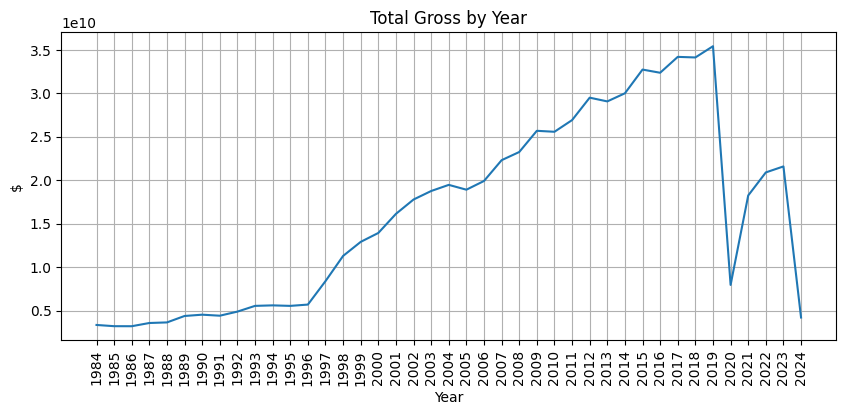

In [8]:
# Total Gross by Year
plt.figure(figsize=(10, 4))
df_year = df.groupby(['Year'])[['Gross']].sum()
sns.lineplot(y='Gross', x='Year', data=df_year, palette='tab20c')
plt.title("Total Gross by Year")
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel("$")
plt.grid()
plt.show()

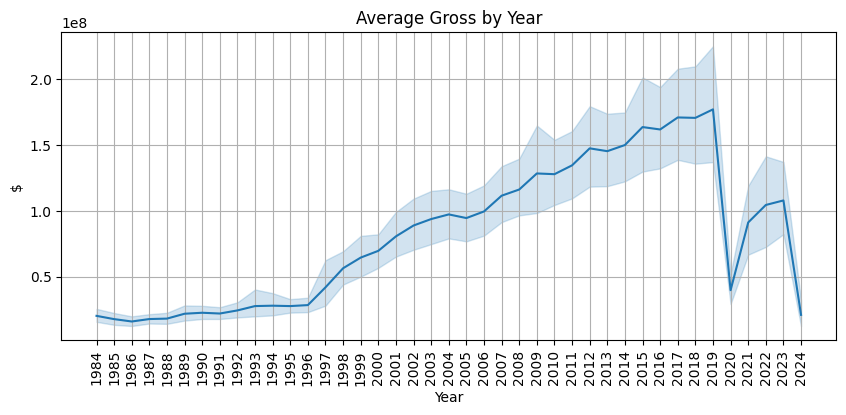

In [9]:
# Average Gross by Year
plt.figure(figsize=(10, 4))
sns.lineplot(y='Gross', x='Year', data=df, palette='tab20c')
plt.title("Average Gross by Year")
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel("$")
plt.grid()
plt.show()

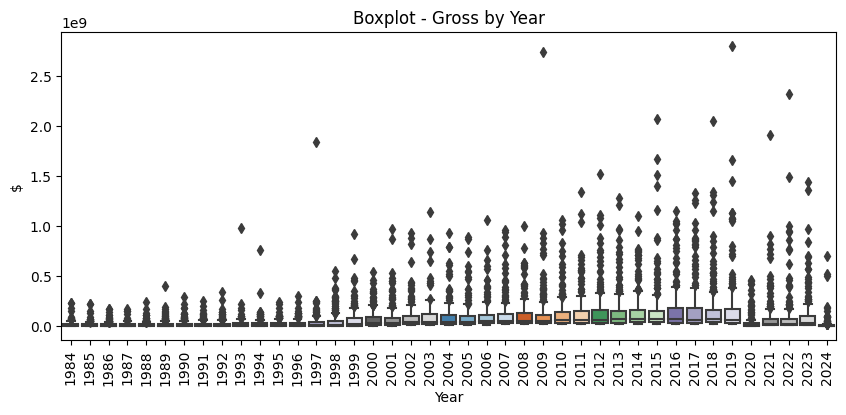

In [10]:
# Boxplot - Gross by Year
plt.figure(figsize=(10, 4))
sns.boxplot(y='Gross', x='Year', data=df, palette='tab20c')
plt.title("Boxplot - Gross by Year")
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel("$")
plt.show()

In [11]:
df_top_year = df.drop_duplicates(subset=['Year'])
df_top_year["Year_Title"] = df_top_year["Year"] + " - " + df_top_year["Title"]

df_top_year.head()

,Year,Title,Gross,Year_Title
0,1984,Beverly Hills Cop,234760478,1984 - Beverly Hills Cop
165,1985,Out of Africa,225526205,1985 - Out of Africa
345,1986,Top Gun,176913085,1986 - Top Gun
545,1987,Three Men and a Baby,167780960,1987 - Three Men and a Baby
745,1988,Who Framed Roger Rabbit,238092487,1988 - Who Framed Roger Rabbit


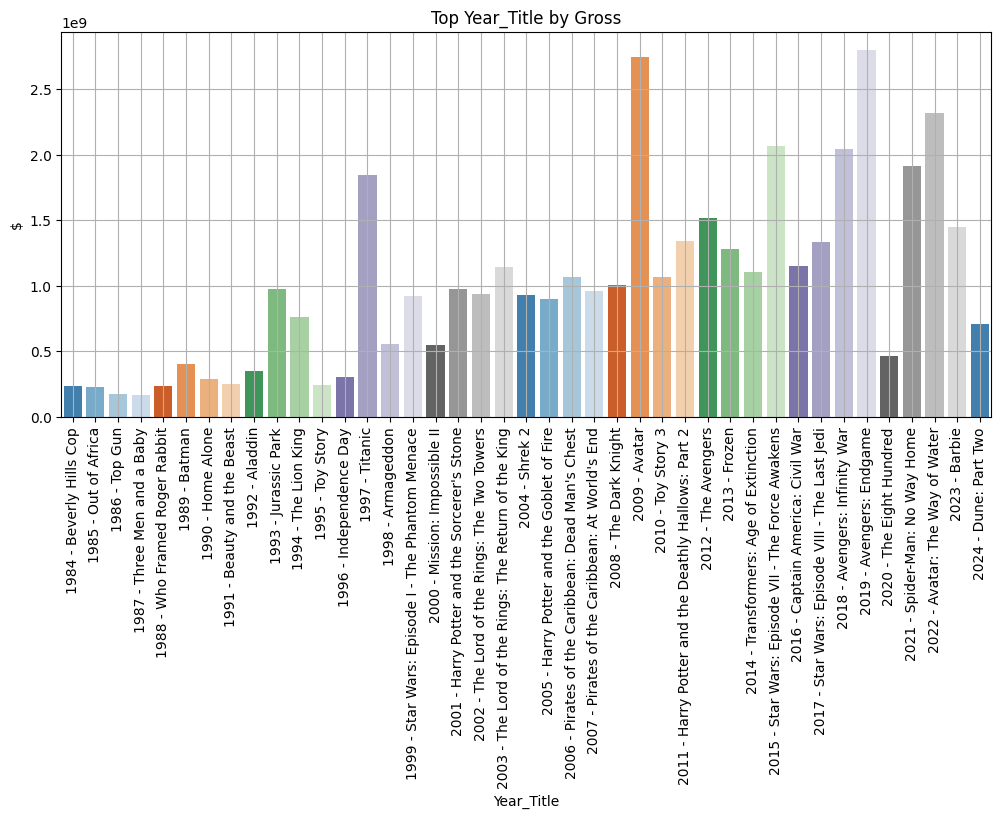

In [12]:
# Top Year_Title by Gross
plt.figure(figsize=(12, 5))
sns.barplot(y='Gross', x='Year_Title', data=df_top_year, palette='tab20c')
plt.title("Top Year_Title by Gross")
plt.xticks(rotation=90)
plt.xlabel('Year_Title')
plt.ylabel("$")
plt.grid()
plt.show()

In [13]:
colors = ["#8c0404","#f25ed0","#21618C","#16A085","#34495E",
          "#C70039", "#FF5733", "#FFC300", "#DAF7A6", "#B3B6B7"]

In [14]:
# Highest Year according to Gross
df_year = df.groupby(['Year'])[['Gross']].sum()
df_year = df_year.sort_values(by=("Gross"), ascending=False).head(10)
iplot(px.bar(df_year,
             text_auto = True,
             color = df_year.index,
             color_discrete_sequence = colors, 
             labels=dict(index="Count Names",value=""),
             title = 'Highest Year according to Gross'
            ))

In [15]:
# Highest Title according to Gross
df_title = df.groupby(['Title'])[['Gross']].sum()
df_title = df_title.sort_values(by=("Gross"), ascending=False).head(10)
iplot(px.bar(df_title,
             text_auto = True,
             color = df_title.index,
             color_discrete_sequence = colors, 
             labels=dict(index="Count Names",value=""),
             title = 'Highest Title according to Gross'
            ))

## <b><div style='padding:15px;background-color:#43A047;color:white;border-radius:10px;font-size:110%;text-align: center'>If you liked this code, consider upvoting it. Thank you.</div></b>